In [201]:
import gzip
import math
import random
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [202]:
def parseData(fname, lines=100, limit=True):
    count = 0
    for l in open(fname, "rt"):
        count += 1
        yield eval(l)
        if limit and count > lines:
            break

In [203]:
fileName = "reviews.json"

In [204]:
dataDir = "/Users/cairui/Downloads/lthing_data/"

In [205]:
originalDataset = list(parseData(dataDir + fileName, limit=False))

In [206]:
len(originalDataset)

1707070

In [207]:
originalDataset[0]

{'work': '3206242',
 'flags': [],
 'unixtime': 1194393600,
 'stars': 5.0,
 'nhelpful': 0,
 'time': 'Nov 7, 2007',
 'comment': 'This a great book for young readers to be introduced to the world of Middle Earth. ',
 'user': 'van_stef'}

In [208]:
count = 0
relations = []
for l in open(dataDir + "edges.txt"):
    u,i = l.strip().split(' ')
    relations.append((u, i))
    count += 1
#     if count == 10: break

In [209]:
relations[:10]

[('Rodo', 'anehan'),
 ('Rodo', 'sevilemar'),
 ('Rodo', 'dingsi'),
 ('Rodo', 'slash'),
 ('RelaxedReader', 'AnnRig'),
 ('RelaxedReader', 'bookbroke'),
 ('RelaxedReader', 'Bumpersmom'),
 ('RelaxedReader', 'DivaColumbus'),
 ('RelaxedReader', 'AnnRig'),
 ('RelaxedReader', 'bookbroke')]

## 1. Identify Dataset and perform an exploratory analysis of the data

In [210]:
count = 0
for d in originalDataset:
    if not 'stars' in d:
        count += 1

In [211]:
count

319861

### There are 319861 reviews in the dataset which doesn't have a 'stars' field

In [212]:
# dataset = [d for d in originalDataset if 'stars' in d]
dataset = originalDataset

In [213]:
len(dataset)

1707070

In [214]:
usersPerItem = defaultdict(set) # Maps an item to the users who rated it
itemsPerUser = defaultdict(set) # Maps a user to the items that they rated
ratingDict = {} # To retrieve a rating for a specific user/item pair

for d in dataset:
    user,item = d['user'], d['work']
    usersPerItem[item].add(user)
    itemsPerUser[user].add(item)
    if 'stars' in d:
        ratingDict[(user,item)] = d['stars']
    

In [215]:
len(itemsPerUser)

83195

In [216]:
len(usersPerItem)

506165

### Let's see some statistics of the ratings and its distribution

In [217]:
ratings = [d['stars'] for d in dataset if 'stars' in d]

In [218]:
averageRating = np.average(ratings)
medianRating = np.median(ratings)
print("Average rating is:", averageRating)
print("The median of rating is:", medianRating)

Average rating is: 3.8054164873497793
The median of rating is: 4.0


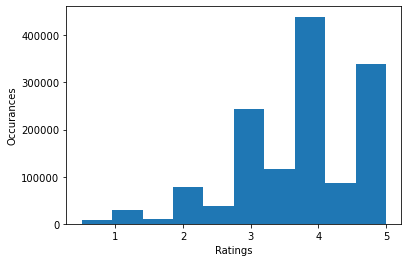

In [219]:
plt.hist(ratings, density=False, bins=10)  # density=False would make counts
plt.ylabel('Occurances')
plt.xlabel('Ratings');

In [220]:
userAverages = {}
itemAverages = {}

for u in itemsPerUser:
    rs = [ratingDict[(u,i)] for i in itemsPerUser[u] if (u, i) in ratingDict]
    if len(rs) != 0:
        userAverages[u] = sum(rs) / len(rs)
    else:
        userAverages[u] = averageRating
    
    
for i in usersPerItem:
    rs = [ratingDict[(u,i)] for u in usersPerItem[i] if (u, i) in ratingDict]
    if len(rs) != 0:
        itemAverages[i] = sum(rs) / len(rs)
    else:
        itemAverages[i] = averageRating

### There is also a 'flags' field in data, let's see what it's about
seems like it's flags about whether the review is legit

In [221]:
flags = [d['flags'] for d in dataset if d['flags'] != []]

In [222]:
flags[:10]

[['not_a_review'],
 ['not_a_review'],
 ['not_a_review'],
 ['abuse', 'not_a_review'],
 ['abuse'],
 ['abuse'],
 ['not_a_review'],
 ['not_a_review'],
 ['not_a_review'],
 ['not_a_review']]

In [223]:
len(flags)

71120

In [224]:
flagsSet = set()
for f in flags:
    for f1 in f:
        flagsSet.add(f1)

In [225]:
flagsSet

{'abuse', 'not_a_review'}

### Check how many reviews have non-zero 'nhelpful'

In [226]:
nhelpful = [d['nhelpful'] for d in dataset]

In [227]:
nonZeroNhelpful = [d['nhelpful'] for d in dataset if d['nhelpful'] != 0]

In [228]:
len(nonZeroNhelpful)

181099

In [229]:
np.average(nhelpful)

0.17973721054203987

In [230]:
np.median(nhelpful)

0.0

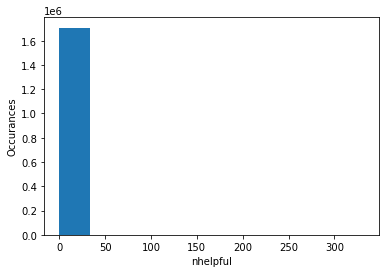

In [231]:
plt.hist(nhelpful, density=False, bins=10)  # density=False would make counts
plt.ylabel('Occurances')
plt.xlabel('nhelpful');

In [232]:
max(nonZeroNhelpful)

332

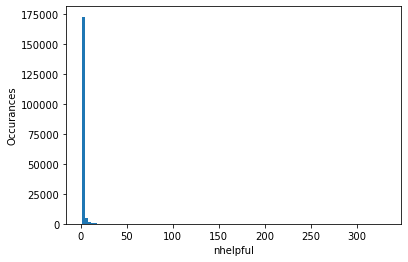

In [233]:
plt.hist(nonZeroNhelpful, density=False, bins=100)  # density=False would make counts
plt.ylabel('Occurances')
plt.xlabel('nhelpful');

In [234]:
time = [d['unixtime'] for d in dataset if 'unixtime' in d and d['unixtime'] != None and d['unixtime'] != -86400]

In [235]:
min(time)

1124582400

In [236]:
max(time)

1377475200

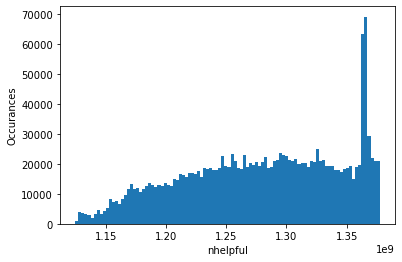

In [237]:
plt.hist(time, density=False, bins=100)  # density=False would make counts
plt.ylabel('Occurances')
plt.xlabel('nhelpful');